In [154]:
import pandas as pd


#### Read the training data
We used the dataset from the sales of Javi's startup

In [155]:
features = pd.read_csv('train.csv')
features= features.drop('ID', axis = 1)

features.head(10)

,MONTH,DAY,YEAR,PL,XC,VL,CI,MT,CT,NV,...,NT,TC,CH,CK,RC,HM,PT,MC,CJ,AVERAGE
0,12,31,2017,3,6,7,5,5,0,0,...,5,9,0,3,0,0,0,0,1,2.588235
1,12,29,2017,0,3,0,1,0,0,0,...,4,4,1,2,0,0,0,0,6,1.235294
2,12,28,2017,0,2,3,2,0,0,0,...,2,5,1,1,0,0,0,0,3,1.117647
3,12,22,2017,0,4,2,3,3,3,2,...,4,8,0,3,0,0,0,0,0,1.882353
4,12,21,2017,1,2,1,4,1,0,2,...,1,0,0,4,0,0,0,0,2,1.058824
5,12,20,2017,1,4,3,0,1,0,4,...,7,6,0,8,0,2,0,0,0,2.117647
6,12,19,2017,0,6,5,3,3,0,4,...,4,5,2,6,0,0,0,0,0,2.235294
7,12,18,2017,0,3,2,2,1,0,0,...,4,3,0,3,0,0,0,0,0,1.352941
8,12,16,2017,7,8,5,10,9,0,0,...,12,10,7,7,0,8,0,0,0,4.882353
9,12,15,2017,0,8,5,7,5,0,0,...,7,3,4,7,0,3,0,0,4,3.235294


#### Describe the data.
With this function we can graphically see the anomalies and patterns of the data.

In [156]:
features.describe()

,MONTH,DAY,YEAR,PL,XC,VL,CI,MT,CT,NV,...,NT,TC,CH,CK,RC,HM,PT,MC,CJ,AVERAGE
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5.760563,15.204225,2017.612676,1.711268,4.035211,1.746479,2.218310,1.204225,0.605634,0.105634,...,3.598592,3.352113,0.478873,3.50000,0.767606,1.647887,0.281690,0.197183,1.126761,1.603148
std,4.052719,8.298115,0.488863,3.708493,7.174039,2.701291,4.024951,2.386542,1.443782,0.554898,...,4.868570,4.835151,1.270049,4.41588,2.242926,2.813839,1.054314,0.610074,1.565855,2.040853
min,1.000000,1.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647
25%,2.000000,8.250000,2017.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.647059
50%,4.000000,15.000000,2018.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,2.00000,0.000000,1.000000,0.000000,0.000000,1.000000,0.941176
75%,10.000000,21.000000,2018.000000,1.750000,4.000000,2.000000,3.000000,1.000000,0.000000,0.000000,...,4.000000,4.000000,0.000000,4.00000,0.000000,2.000000,0.000000,0.000000,2.000000,1.470588
max,12.000000,31.000000,2018.000000,21.000000,61.000000,12.000000,35.000000,14.000000,8.000000,4.000000,...,26.000000,28.000000,9.000000,26.00000,19.000000,19.000000,8.000000,4.000000,8.000000,12.588235


In [157]:
import numpy as np

#### We put 'AVERAGE' column in the labels
Because it's the value we want to predict

In [158]:
labels = np.array(features['AVERAGE'])
feature_list = list(features.columns)

features = np.array(features)

#### We use 90% of the data as training data and the other 10% as testing data.

In [159]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.10, random_state = 42)

In [160]:
baseline_preds = test_features

#### Create 1000 decision trees.
The we train each tree with the features and labels.

In [161]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators= 1000, random_state=42)

randomForest.fit(train_features, train_labels);

In [162]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.33 %.


In [163]:
from sklearn.tree import export_graphviz
import pydot

##### We can get the sorted importances of the features (sorted)

In [164]:
importances = list(randomForest.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AVERAGE              Importance: 0.52
Variable: NT                   Importance: 0.32
Variable: HM                   Importance: 0.04
Variable: XC                   Importance: 0.03
Variable: MT                   Importance: 0.02
Variable: TC                   Importance: 0.02
Variable: CK                   Importance: 0.02
Variable: PL                   Importance: 0.01
Variable: CI                   Importance: 0.01
Variable: RM                   Importance: 0.01
Variable: MONTH                Importance: 0.0
Variable: DAY                  Importance: 0.0
Variable: YEAR                 Importance: 0.0
Variable: VL                   Importance: 0.0
Variable: CT                   Importance: 0.0
Variable: NV                   Importance: 0.0
Variable: CH                   Importance: 0.0
Variable: RC                   Importance: 0.0
Variable: PT                   Importance: 0.0
Variable: MC                   Importance: 0.0
Variable: CJ                   Importance: 0.0


#### To improve our results, we can create a new random forest with the two most important features as labels.
Note that the accuracy improved 0.5% in this case

In [165]:
importantLabels = RandomForestRegressor(n_estimators= 1000, random_state=42)

important_indices = [feature_list.index('PT'), feature_list.index('AVERAGE')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

importantLabels.fit(train_important, train_labels)

predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

mape = np.mean(100 * (errors / 17))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.87 %.


#### We graph the relative importances

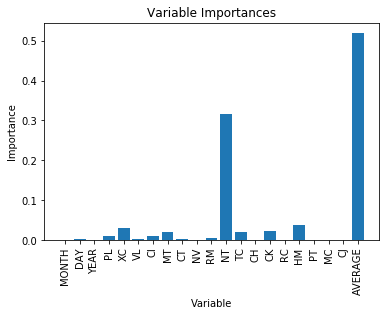

In [166]:
import matplotlib.pyplot as plt

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')

plt.xticks(x_values, feature_list, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

#### Just parsing the date colum... don't mind this.

In [167]:
import datetime

months = features[:, feature_list.index('MONTH')]
days = features[:, feature_list.index('DAY')]
years = features[:, feature_list.index('YEAR')]

dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

months = test_features[:, feature_list.index('MONTH')]
days = test_features[:, feature_list.index('DAY')]
years = test_features[:, feature_list.index('YEAR')]

test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

#### We plot the predictions vs the actual values of average sales.
Then we compare the results just to make sure our model is correct.

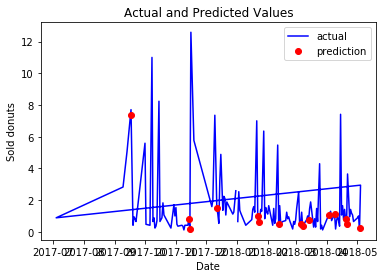

In [169]:
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')

plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.legend()

plt.xlabel('Date'); plt.ylabel('Sold donuts'); plt.title('Actual and Predicted Values');